In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [725]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [726]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [727]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [728]:
df.shape

(614, 13)

In [729]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [731]:
df.drop(columns='Loan_ID',axis=1,inplace=True)

In [732]:
# % of missing values in given features
for i in df.columns:
    print(i,np.round(df[i].isnull().mean(),2)*100,'% missing value')

Gender 2.0 % missing value
Married 0.0 % missing value
Dependents 2.0 % missing value
Education 0.0 % missing value
Self_Employed 5.0 % missing value
ApplicantIncome 0.0 % missing value
CoapplicantIncome 0.0 % missing value
LoanAmount 4.0 % missing value
Loan_Amount_Term 2.0 % missing value
Credit_History 8.0 % missing value
Property_Area 0.0 % missing value
Loan_Status 0.0 % missing value


In [733]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

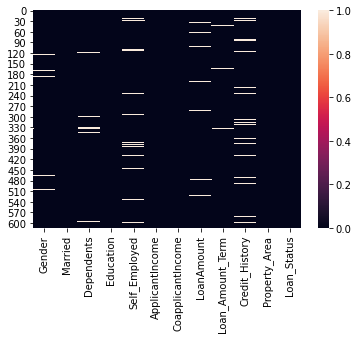

In [734]:
sns.heatmap(df.isnull())

In [735]:
# check duplicate values
df.duplicated().sum()

0

In [736]:
categorical_features=[features for features in df.columns if df[features].dtypes == 'O']
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [737]:
numerical_features=[features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [738]:
descreate_features=[features for features in numerical_features if len(df[features].unique())<25]
descreate_features

['Loan_Amount_Term', 'Credit_History']

In [739]:
#  check unique values in features
for i in descreate_features:
    print('\n',df[i].value_counts())


 360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

 1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [740]:
#chech unique values in categery features
for i in categorical_features:
    print('\n',df[i].value_counts())


 Male      489
Female    112
Name: Gender, dtype: int64

 Yes    398
No     213
Name: Married, dtype: int64

 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 No     500
Yes     82
Name: Self_Employed, dtype: int64

 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

 Y    422
N    192
Name: Loan_Status, dtype: int64


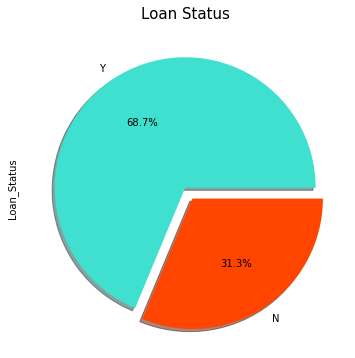

In [741]:
df['Loan_Status'].value_counts().plot(kind='pie',autopct='%.1f%%',explode=[0,0.1],shadow=True,figsize=(6,6),colors=['turquoise', 'orangered'])
plt.title('Loan Status',fontsize=15)
plt.show()


##### from graph getting loan ration is high 68% people chances getting of loan

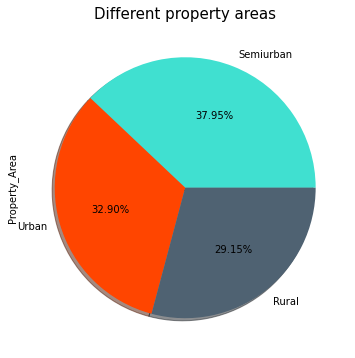

In [742]:
# people stay in different area of region in accordance to getting chances of loan 
df['Property_Area'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0,0],shadow=True,figsize=(6,6),colors=['turquoise', 'orangered','#4F6272'])
plt.title('Different property areas',fontsize=15)
plt.show()

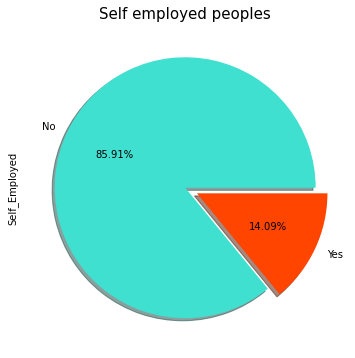

In [743]:
df['Self_Employed'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0.1],shadow=True,figsize=(6,6),colors=['turquoise', 'orangered'])
plt.title('Self employed peoples',fontsize=15)
plt.show()

#### from the graph self employed or business persons are less & SALARIED persons more for loan application

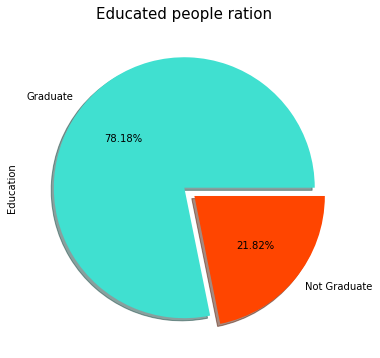

In [744]:
df['Education'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0.1],shadow=True,figsize=(6,6),colors=['turquoise', 'orangered'])
plt.title('Educated people ration',fontsize=15)
plt.show()

#### graduate people ratio is more 

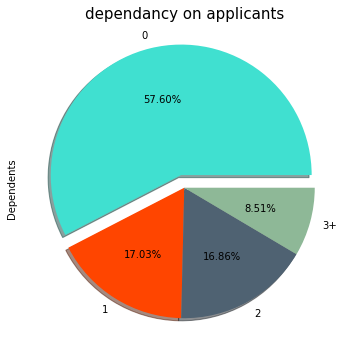

In [745]:
df['Dependents'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0.1,0,0,0],shadow=True,figsize=(6,6),colors=['turquoise', 'orangered','#4F6272','#8EB897'])
plt.title('dependancy on applicants',fontsize=15)
plt.show()

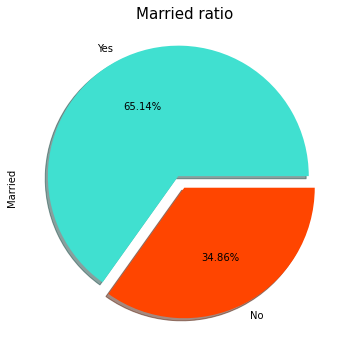

In [746]:
df['Married'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0.1,0],shadow=True,figsize=(6,6),colors=['turquoise', 'orangered'])
plt.title('Married ratio',fontsize=15)
plt.show()

#### most of person are married who want loan

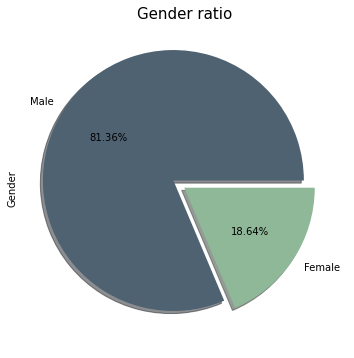

In [747]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0.1,0],shadow=True,figsize=(6,6),colors=['#4F6272','#8EB897'])
plt.title('Gender ratio',fontsize=15)
plt.show()

#### loan taking more by male as compare to female

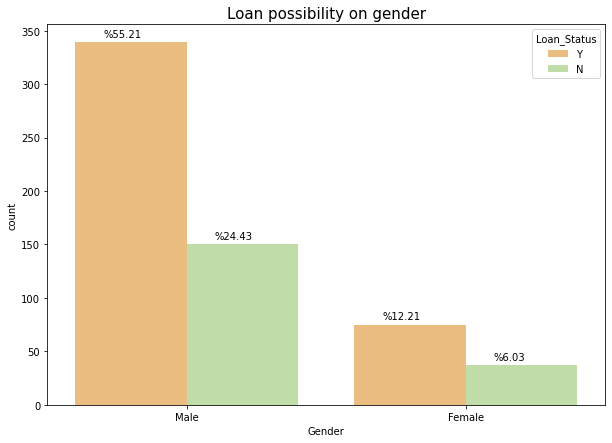

In [748]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Gender',hue='Loan_Status',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.1, p.get_height()+5))
plt.title('Loan possibility on gender',fontsize=15),
plt.show()

#### from the grap getting chance of loan more in female 12% out of 6% almost 50-50% chance
#### as in male ratio is 60-40%

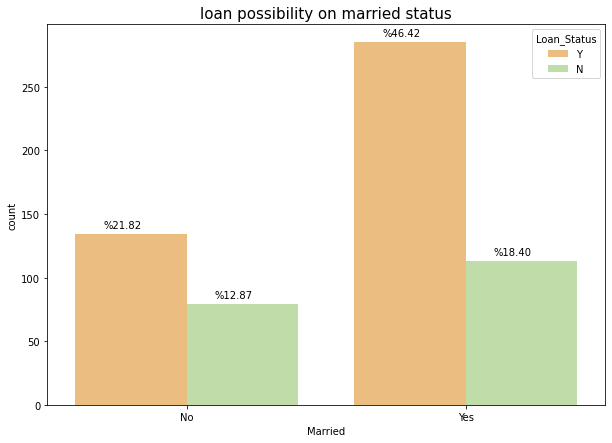

In [749]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Married',hue='Loan_Status',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.1, p.get_height()+5))
plt.title('loan possibility on married status',fontsize=15),
plt.show()

### unmarried persons have less chance of get loan 

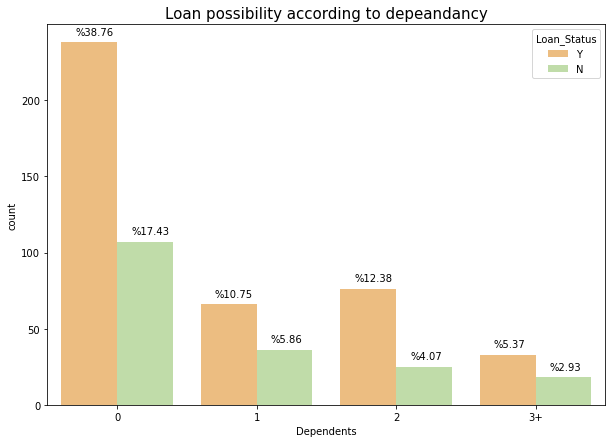

In [750]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Dependents',hue='Loan_Status',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.1, p.get_height()+5))
plt.title('Loan possibility according to depeandancy',fontsize=15),
plt.show()

#### dependancy of 0 and 2 have more chances to get loan

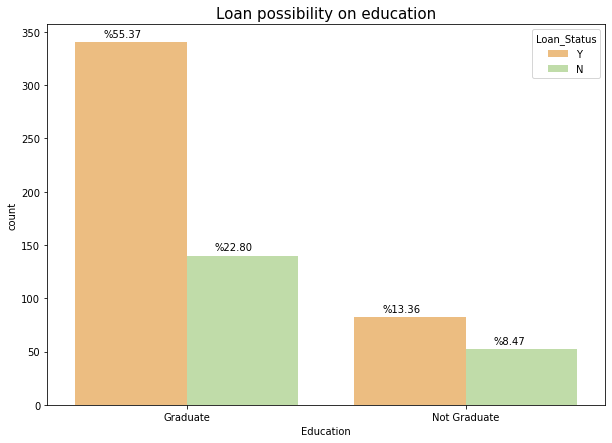

In [751]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Education',hue='Loan_Status',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.1, p.get_height()+5))
plt.title('Loan possibility on education',fontsize=15),
plt.show()

In [890]:
#### un educated persons have less chances of getting loan

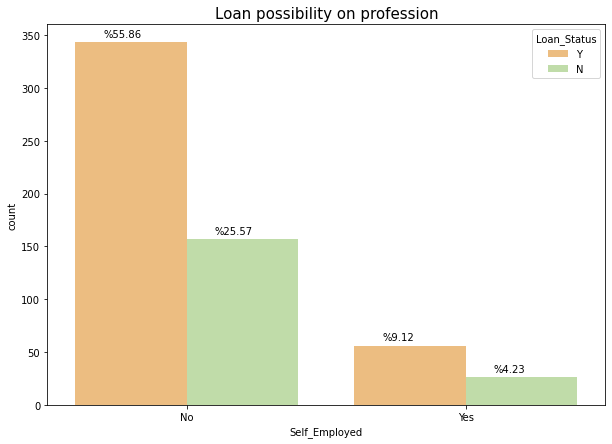

In [752]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.1, p.get_height()+5))
plt.title('Loan possibility on profession',fontsize=15),
plt.show()

#### most salaried persons have getting probability of loan

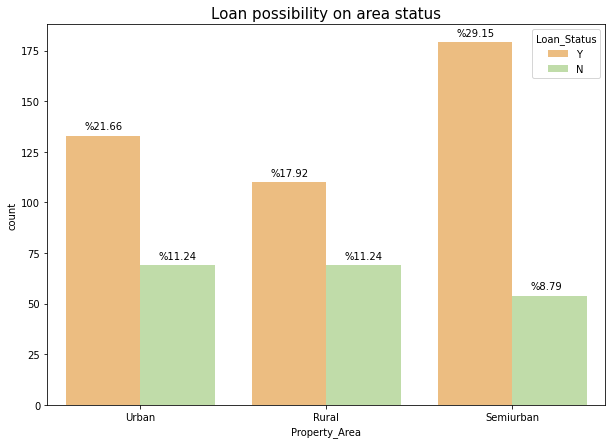

In [753]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Property_Area',hue='Loan_Status',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.1, p.get_height()+3))
plt.title('Loan possibility on area status',fontsize=15),
plt.show()

#### semiurban area people have more chances of getting loan

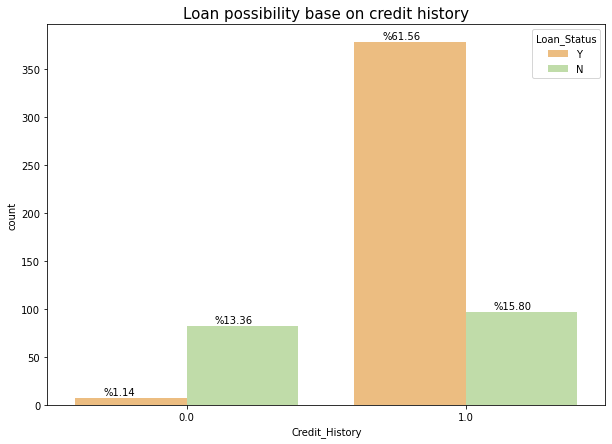

In [754]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Credit_History',hue='Loan_Status',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.1, p.get_height()+3))
plt.title('Loan possibility base on credit history',fontsize=15),
plt.show()

#### persons who has good history of payments hight chances of getting loans

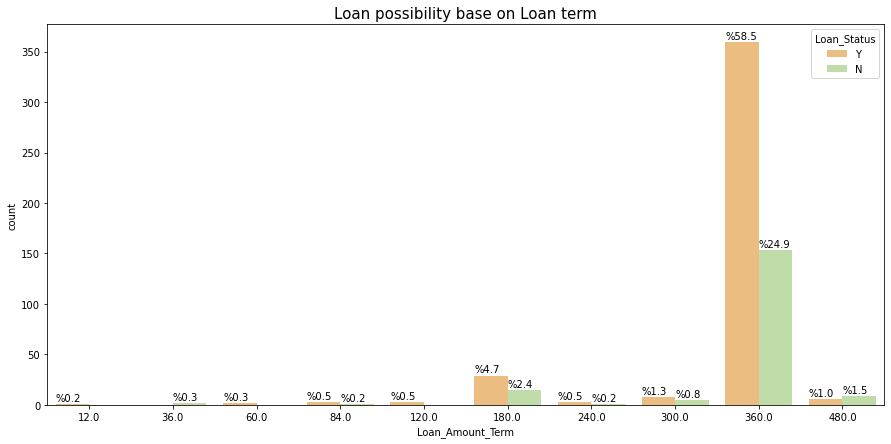

In [755]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.1f}'.format(p.get_height()/614*100), (p.get_x(), p.get_height()+3))
plt.title('Loan possibility base on Loan term',fontsize=15),
plt.show()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

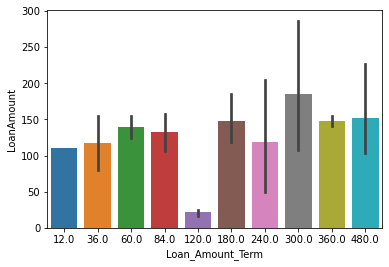

In [756]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)

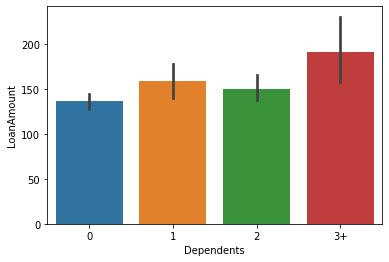

In [757]:
# more than 1 dependents have high demand of loan amount
sns.barplot(y="LoanAmount",x="Dependents",data=df)
plt.show()

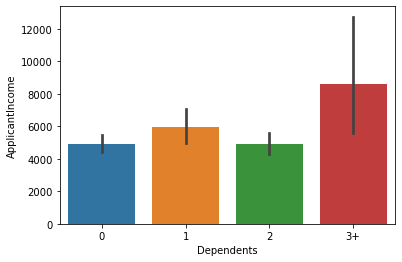

In [758]:
# on applicant income more 3 persons have high dependancy
sns.barplot(y="ApplicantIncome",x="Dependents",data=df)
plt.show()

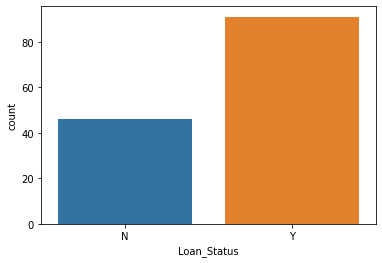

In [759]:
sns.countplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"]>6000])
plt.show()

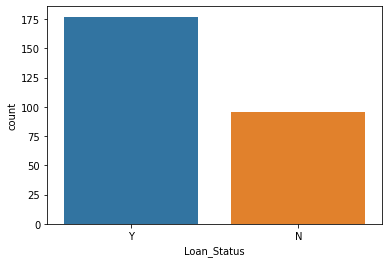

In [760]:
# coapplicants income doesn't effect loan possibility
sns.countplot(x="Loan_Status",data=df.loc[df["CoapplicantIncome"]==0])
plt.show()

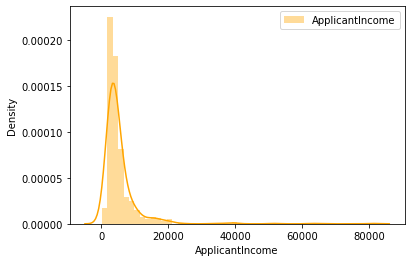

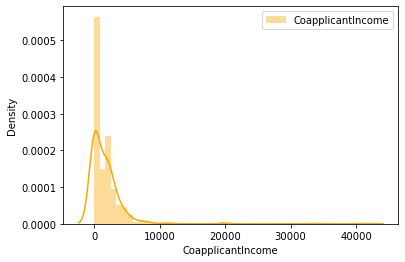

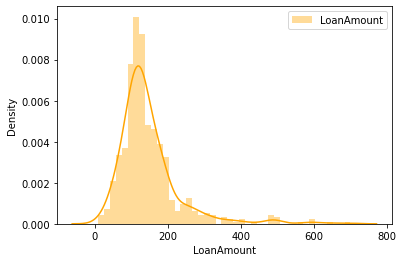

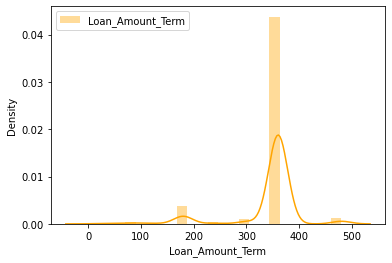

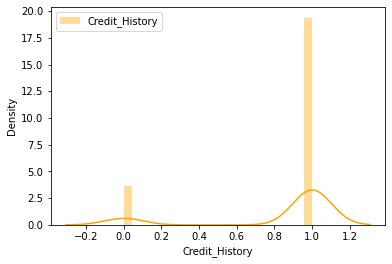

In [761]:
for i in numerical_features:
    plt.plot()
    sns.distplot(df[i],label=i,color='orange')
    plt.legend()
    plt.show()

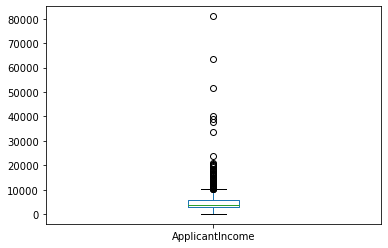

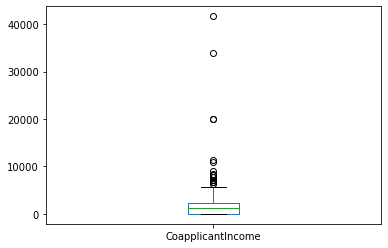

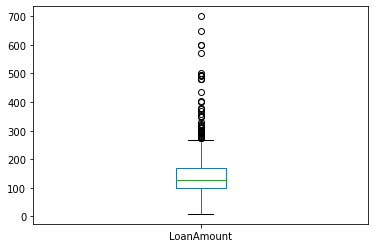

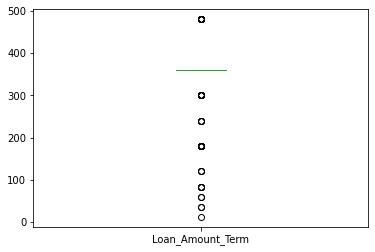

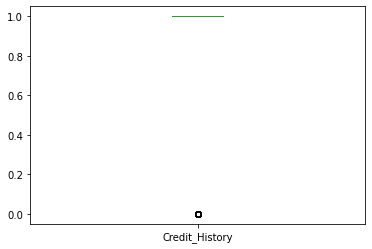

In [762]:
for i in numerical_features:
    plt.plot()
    df[i].plot(kind='box')
    plt.show()

### from that graphical represnt all numerical independents featires have skew and outliers

In [763]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### applicant income std is more than mean and max very high than 75 percentile so have right skewed data and outliers
#### coapplicant income also have right skewed data and outliers
#### loan amount and loan amount term have mean more than std so have left skewed data and outliers as well
#### credit histry is binomial distribution

In [766]:
# filling null values of categorical columns by mode
for i in df.columns:
    if df[i].dtypes == 'O' and df[i].isnull().sum()>0:
        df.loc[df['Loan_Status']=='Y',[i]]=df.loc[df['Loan_Status']== 'Y',[i]].fillna(df.loc[df['Loan_Status']=='Y',[i]].mode().iloc[0])
        df.loc[df['Loan_Status']=='N',[i]]=df.loc[df['Loan_Status']== 'N',[i]].fillna(df.loc[df['Loan_Status']=='N',[i]].mode().iloc[0])
        

In [768]:
# filling null values of numerical columns by median bcs of skewness
for i in df.columns:
    if df[i].isnull().sum()>0:
        df.loc[df['Loan_Status']=='Y',[i]]=df.loc[df['Loan_Status']=='Y',[i]].fillna(df.loc[df['Loan_Status']=='Y',[i]].mode().iloc[0])
        df.loc[df['Loan_Status']=='N',[i]]=df.loc[df['Loan_Status']=='N',[i]].fillna(df.loc[df['Loan_Status']=='N',[i]].mode().iloc[0])

In [769]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [770]:
# checking skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.744638
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [771]:
#dividing it into input and output
x=df.drop(columns=["Loan_Status"])
y=df[["Loan_Status"]]

In [772]:
# remove skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        

In [773]:
x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.128211
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [782]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [776]:
# encoding categerical columns
lb=LabelEncoder()
for i in x.columns:
    x[i]=lb.fit_transform(x[i])

In [778]:
lb.fit(y)
y=lb.transform(y)

In [781]:
sc=StandardScaler()
sc.fit(x)
x1=sc.transform(x)
x1=pd.DataFrame(x1,columns=x.columns)
x1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.898633,-0.852357,-0.291901,0.299776,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.410559,-0.204048,-0.115409,0.299776,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.753846,-0.852357,-1.328788,0.299776,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-1.095498,0.876466,-0.291901,0.299776,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.933495,-0.852357,0.171389,0.299776,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.851461,-0.852357,-1.262604,0.299776,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.194412,-0.852357,-1.747956,-2.407023,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.282119,-0.819941,1.671567,0.299776,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,1.219367,-0.852357,1.009724,0.299776,0.411733,1.223298


In [784]:
# balancing data set
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x2,y2=sm.fit_resample(x1,y)

In [785]:
np.bincount(y)

array([192, 422], dtype=int64)

In [887]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score,roc_curve
lg=LogisticRegression()

In [788]:
# select best random state
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=i)
    lg.fit(x_train,y_train)
    pred_tr=lg.predict(x_train)
    pred_te=lg.predict(x_test)
    if round(roc_auc_score(y_train,pred_tr)*100,1)==round(roc_auc_score(y_test,pred_te)*100,1):
        print('\n Random State',i)
        print('roc auc_score TR',roc_auc_score(y_train,pred_tr)*100)
        print('roc auc_score TE',roc_auc_score(y_test,pred_te)*100)


 Random State 10
roc auc_score TR 70.12366983031349
roc auc_score TE 70.1260215858756

 Random State 11
roc auc_score TR 70.97660200422911
roc auc_score TE 71.02357320099256

 Random State 109
roc auc_score TR 71.08843537414967
roc auc_score TE 71.05654761904762

 Random State 115
roc auc_score TR 71.02387115329307
roc auc_score TE 71.02439328716702


In [789]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=115)
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print('Train score:',lg.score(x_train,y_train)*100)
print('auc roc score',roc_auc_score(y_test,pred_lg)*100)
print('f1 Score: ',f1_score(y_test,pred_lg)*100)
print('accuracy score',accuracy_score(y_test,pred_lg)*100)
print('Confusion matrix \n',confusion_matrix(y_test,pred_lg))
print('Classification report \n',classification_report(y_test,pred_lg))


Train score: 71.69491525423729
auc roc score 71.02439328716702
f1 Score:  72.79151943462897
accuracy score 69.68503937007874
Confusion matrix 
 [[ 74  63]
 [ 14 103]]
Classification report 
               precision    recall  f1-score   support

           0       0.84      0.54      0.66       137
           1       0.62      0.88      0.73       117

    accuracy                           0.70       254
   macro avg       0.73      0.71      0.69       254
weighted avg       0.74      0.70      0.69       254



In [790]:
dtc=DecisionTreeClassifier()
svc=SVC()
kn=KNeighborsClassifier()
sgd=SGDClassifier()
xgb=XGBClassifier()
xgbr=XGBRFClassifier()

In [791]:
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kn, neighbors, cv=5,scoring="roc_auc")
clf.fit(x2,y2)
clf.best_params_

{'n_neighbors': 2}

In [793]:
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x2,y2)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [795]:
def classifiers(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('auc roc score',roc_auc_score(y_test,pred)*100)
    print('Accuracy score:\n',accuracy_score(y_test,pred)*100)
    print('F1 score:\n',f1_score(y_test,pred)*100)
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))

In [796]:
classifiers(dtc)

DecisionTreeClassifier() 
 100.0
auc roc score 72.20662549129702
Accuracy score:
 72.44094488188976
F1 score:
 69.82758620689656
Confusion matrix:
 [[103  34]
 [ 36  81]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75       137
           1       0.70      0.69      0.70       117

    accuracy                           0.72       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.72      0.72      0.72       254



In [797]:
classifiers(SVC(kernel='rbf',C=10))

SVC(C=10) 
 88.98305084745762
auc roc score 73.30151600224593
Accuracy score:
 73.62204724409449
F1 score:
 70.74235807860262
Confusion matrix:
 [[106  31]
 [ 36  81]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       137
           1       0.72      0.69      0.71       117

    accuracy                           0.74       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.74      0.74      0.74       254



In [800]:
classifiers(KNeighborsClassifier(n_neighbors=2))

KNeighborsClassifier(n_neighbors=2) 
 88.30508474576271
auc roc score 73.14866803917899
Accuracy score:
 74.80314960629921
F1 score:
 65.59139784946237
Confusion matrix:
 [[129   8]
 [ 56  61]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80       137
           1       0.88      0.52      0.66       117

    accuracy                           0.75       254
   macro avg       0.79      0.73      0.73       254
weighted avg       0.78      0.75      0.73       254



In [799]:
classifiers(sgd)

SGDClassifier() 
 67.11864406779661
auc roc score 63.7407199450995
Accuracy score:
 63.77952755905512
F1 score:
 61.66666666666667
Confusion matrix:
 [[88 49]
 [43 74]]
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.66       137
           1       0.60      0.63      0.62       117

    accuracy                           0.64       254
   macro avg       0.64      0.64      0.64       254
weighted avg       0.64      0.64      0.64       254



In [801]:
classifiers(xgb)

[12:44:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
 100.0
auc roc score 78.42972113045104
Accuracy score:
 78.34645669291339
F1 score:
 77.17842323651453
Conf

In [802]:
classifiers(xgbr)

[12:45:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None) 
 88.13559322033898
auc roc score 75.82194771975794
Accuracy score:
 75.19685039370079
F1 score:
 75.67567567567566
Confusion matrix:
 

In [803]:
# ensemble methods
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [805]:
ensemble=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in ensemble:
    i.fit(x_train,y_train)
    print(i,'\n\n score: \n',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print('auc roc score',roc_auc_score(y_test,pred)*100)
    print(' F1 score:',f1_score(y_test,pred)*100)
    print('Accuracy scoer:\n',accuracy_score(y_test,pred)*100)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('\n')

RandomForestClassifier() 

 score: 
 100.0
auc roc score 79.71177241250234
 F1 score: 78.68852459016394
Accuracy scoer:
 79.52755905511812
Confusion_matrix:
 [[106  31]
 [ 21  96]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       137
           1       0.76      0.82      0.79       117

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.79       254
weighted avg       0.80      0.80      0.80       254



AdaBoostClassifier() 

 score: 
 81.86440677966101
auc roc score 78.43907916900619
 F1 score: 77.95275590551181
Accuracy scoer:
 77.95275590551181
Confusion_matrix:
 [[99 38]
 [18 99]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       137
           1       0.72      0.85      0.78       117

    accuracy                           0.78       254
   macro avg       0.78      0.78      

In [812]:
# hyper parameter tuning
parameters={"n_estimators":[1000,500,100],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'class_weight':['balanced','balanced_subsample']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x2,y2)
clf.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 500}

In [827]:
rf=RandomForestClassifier(criterion='gini',max_features='auto',n_estimators=2000,class_weight='balanced_subsample')
rf.fit(x_train,y_train)
print(rf,'\n\n score: \n',rf.score(x_train,y_train)*100)
pred_rf=rf.predict(x_test)
print('auc roc score:',roc_auc_score(y_test,pred_rf)*100)
print(' F1 score:',f1_score(y_test,pred_rf)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_rf)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_rf))
print('Classification report:\n',classification_report(y_test,pred_rf))

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=2000) 

 score: 
 100.0
auc roc score: 79.64938548880156
 F1 score: 78.51239669421489
Accuracy scoer:
 79.52755905511812
Confusion_matrix:
 [[107  30]
 [ 22  95]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       137
           1       0.76      0.81      0.79       117

    accuracy                           0.80       254
   macro avg       0.79      0.80      0.79       254
weighted avg       0.80      0.80      0.80       254



In [875]:
xg1=XGBClassifier(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.8,
                      subsample = 1, 
                      n_estimators=1000, 
                      reg_alpha = 0.2,
                      max_depth=3, 
                      gamma=3)
xg1.fit(x_train,y_train)
print(xg1,'\n\n score: \n',xg1.score(x_train,y_train)*100)
pred_xg=xg1.predict(x_test)
print('auc roc score:',roc_auc_score(y_test,pred_xg)*100)
print(' F1 score:',f1_score(y_test,pred_xg)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_xg)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_xg))
print('Classification report:\n',classification_report(y_test,pred_xg))


[16:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 

 score: 
 81.1864406779661
auc roc score: 80.0954519932622
 F1 score: 78.51239669421489
Accuracy scoer:
 79.

In [882]:
# check cross val score
for i in range(2,10):
    crs_score=cross_val_score(rf,x2,y2,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',roc_auc_score(y_test,pred_rf)*100)

cv value: 2
cross value score: 79.97630331753554
actual score: 79.64938548880156
cv value: 3
cross value score: 81.87661425338413
actual score: 79.64938548880156
cv value: 4
cross value score: 83.41232227488152
actual score: 79.64938548880156
cv value: 5
cross value score: 82.59157509157508
actual score: 79.64938548880156
cv value: 6
cross value score: 83.1872678149274
actual score: 79.64938548880156
cv value: 7
cross value score: 84.25816607634789
actual score: 79.64938548880156
cv value: 8
cross value score: 84.0318957771788
actual score: 79.64938548880156
cv value: 9
cross value score: 84.25989476092428
actual score: 79.64938548880156


In [881]:
for i in range(2,15):
   
    crs_score=cross_val_score(xg1,x2,y2,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',roc_auc_score(y_test,pred_xg)*100)
warnings.filterwarnings("ignore")    

[16:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cv value: 2
cross value score: 71.91943127962085
actual score: 80.0954519932622
[16:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old 

In [885]:
warnings.filterwarnings("ignore") 
scores=cross_val_score(xg1,x2,y2,cv=13)
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

[16:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

###  Base on less difference b/t cv & roc score select XGBoost classifier

AUC roc score:  0.800954519932622


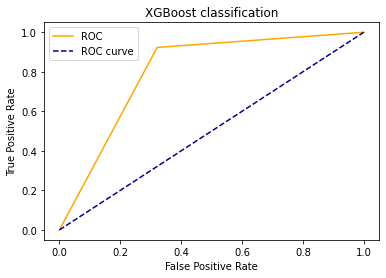

In [888]:
fpr, tpr, threshold = roc_curve(y_test,pred_xg)
print('AUC roc score: ',roc_auc_score(y_test,pred_xg))
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost classification')
plt.legend()
plt.show()

In [889]:
# saving model
import joblib
joblib.dump(xg1,'Loan.obj')
Loan=joblib.load('Loan.obj')
pd.DataFrame({'Actual':y_test,'Predicted':pred_xg})

,Actual,Predicted
0,1,1
1,0,0
2,0,1
3,0,0
4,1,1
...,...,...
249,0,0
250,1,0
251,1,1
252,1,1
